In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [31]:
#read data with pandas library
data= pd.read_excel("dataset.xlsx")

In [32]:
data.head(3) #First 3 samples of the our dataset:

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


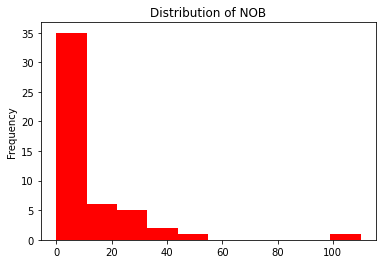

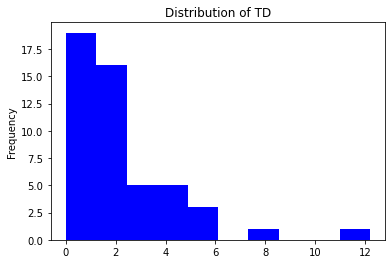

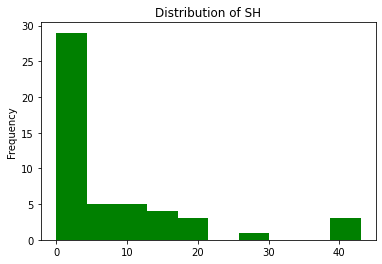

In [33]:
#show the distribution of 3 metrics
def plotHist(columnName,colorName):
    data[columnName].plot(kind="hist", color=colorName)
    plt.title(f"Distribution of {columnName}")
    plt.show()
plotHist("NOB","r")
plotHist("TD","b")
plotHist("SH","g")

In [34]:
#Min max scaler for all data

# perform a robust scaler transform of the dataset
scaler = MinMaxScaler()
for i in data.keys():
    if i != "Name":
        data[[i]]=scaler.fit_transform(data[[i]])
data

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
1,AndroidAsyncHTTP-master,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
2,android-pdf-viewer-master,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
3,android-permission-handler-master,0.009091,0.003268,0.023256,0.0030,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
4,Android-WhatsApp-master,0.000000,0.019608,0.000000,0.1265,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032
5,android-youtubeExtractor-master,0.036364,0.058824,0.162791,0.0500,0.191919,0.254098,0.247059,0.514500,0.279926,0.755345,0.176454,0.532671,0.779704,0.427866,0.745788,0.845116
6,androidtv-sample-inputs-master,0.136364,0.009804,0.000000,0.0775,0.151515,0.081967,0.298861,0.681968,0.338284,0.573309,0.692028,0.541490,0.664970,0.528409,0.524693,0.725994
7,BirthdayBuddy-master,0.009091,0.000000,0.000000,0.0345,0.050505,0.016393,0.000000,0.000000,0.000000,1.000000,0.103223,0.000000,0.000000,0.000000,0.000000,0.000000
8,dex2jar,0.309091,1.000000,1.000000,1.0000,0.510101,0.139344,0.618665,1.000000,0.332216,0.716229,0.337156,0.743482,0.633001,0.391777,0.826300,0.692359
9,epubator-master,0.000000,0.039216,0.186047,0.0670,0.000000,0.245902,0.315394,0.596833,0.252593,0.110854,0.127673,0.374684,0.473776,0.370890,0.308613,0.517937


# Part1 (Statistical Correlation Analysis)

In [35]:
#Show the correlation matrix of all metrics
data.corr(method="spearman")

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [36]:
#P values of Spearman Correlation Table
from scipy import stats 
pv_keys=[i for i in data.keys() if i != "Name"]
pv = np.round(stats.spearmanr(data.iloc[:,1:])[1],4)
pvalues = pd.DataFrame(pv,columns=pv_keys,index=pv_keys)
pvalues

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,0.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,0.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,0.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
CS,0.0000,0.0000,0.0000,0.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,0.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,0.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,0.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,0.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,0.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
LOC,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,0.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


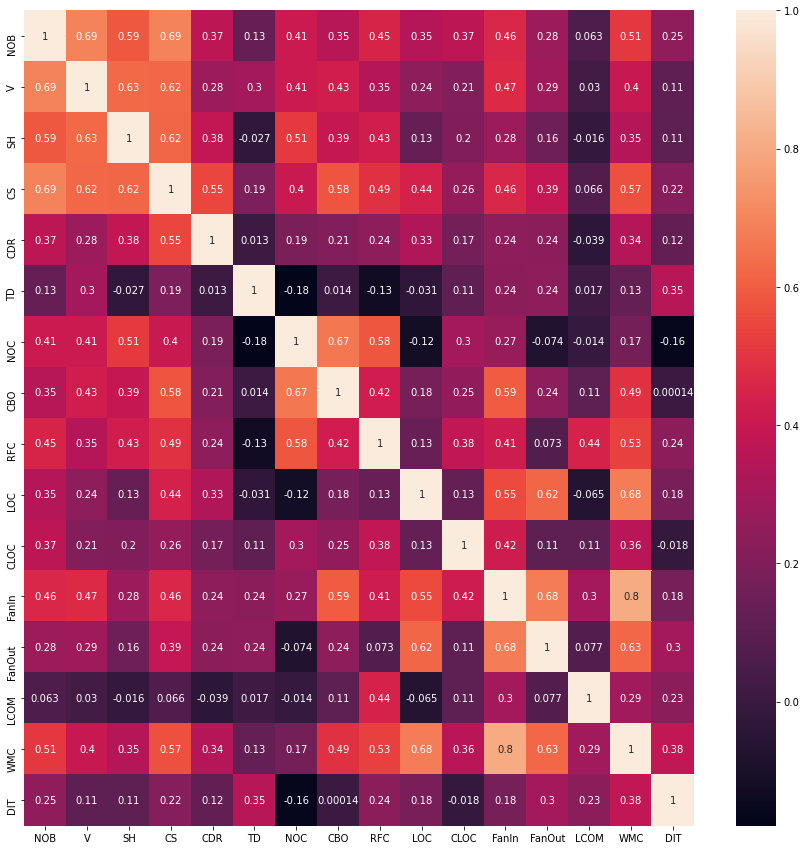

In [37]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(method="spearman"),annot=True)
plt.show()

In [38]:
#Correlation between External Metrics & TD
data.iloc[:,1:7].corr(method="spearman")

,NOB,V,SH,CS,CDR,TD
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000


In [39]:
#Correlation between Internal Metrics & TD
data.iloc[:,5:].corr(method="spearman")

,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
CDR,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072
CLOC,0.171773,0.114297,0.297347,0.250408,0.381636,0.126681,1.000000,0.416789,0.109636,0.107619,0.355080,-0.017867
FanIn,0.243709,0.239077,0.268289,0.594578,0.414878,0.554326,0.416789,1.000000,0.679297,0.296355,0.802910,0.179395
FanOut,0.237237,0.240135,-0.074350,0.240953,0.072564,0.618676,0.109636,0.679297,1.000000,0.076982,0.626327,0.295389
LCOM,-0.038683,0.017159,-0.013518,0.109694,0.444076,-0.065455,0.107619,0.296355,0.076982,1.000000,0.291312,0.229251


# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid
random_state_fixed=53

#This function plots graphs to improve visual confirmation
def plotGraph(y_test,y_pred,regressorName):
    #Plot the Scatter Graph to see results better
    plt.scatter(y_test,y_test, label='Original Values', color= "r")
    plt.scatter(y_test,y_pred, label='Predicted Values', color= "b")
    #plt.xlim(0, 1)
    #plt.ylim(0, 1)
    plt.title(f'{regressorName}')
    plt.legend(loc="upper left")
    plt.show()

#Linear Regressor is one of the best choice for the data that is correlated linearly:

def linearRegression(X_train,y_train,X_test,y_test,regressorName):
    #Create the regressor: reg_all
    name = regressorName
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_predict =reg.predict(X_test)
    print('Linear Regression- R-Squared Value:', r2_score(y_test,y_predict))
    print('Linear Regression- Root Mean Squared Error:', mean_squared_error(y_test,y_predict,squared=False))
    plotGraph(y_test,y_predict,name)



#SVR is also one of the most common regressor that used for regression predictions
def svrRegression(X_train,y_train,X_test,y_test,regressorName):
    name = regressorName
    if "rbf" in regressorName:
        reg = SVR(kernel="rbf")
    if "linear" in regressorName:
        reg = SVR(kernel="linear")
    reg.fit(X_train, y_train)
    y_predict =reg.predict(X_test)
    if "rbf" in regressorName:
        print('rbf kernel- R-Squared Value:', r2_score(y_test,y_predict))
        print('rbf kernel- Root Mean Squared Error:', mean_squared_error(y_test,y_predict,squared=False))
    if "linear" in regressorName:
        print('linear kernel- R-Squared Value:', r2_score(y_test,y_predict))
        print('linear kernel- Root Mean Squared Error:', mean_squared_error(y_test,y_predict,squared=False))
    plotGraph(y_test,y_predict,name)



def decisionTreeRegression(X_train,y_train,X_test,y_test,regressorName):
    name = regressorName
    reg = DecisionTreeRegressor(random_state=random_state_fixed)
    reg.fit(X_train, y_train)
    y_predict =reg.predict(X_test)
    print('Decision Tree Regression- R-Squared Value:', r2_score(y_test,y_predict))
    print('Decision Tree Regression- Root Mean Squared Error:', mean_squared_error(y_test,y_predict,squared=False))
    plotGraph(y_test,y_predict,name)


def randomDecTreeRegression(X_train,y_train,X_test,y_test,regressorName):
    name = regressorName
    reg = RandomForestRegressor(random_state=random_state_fixed)
    reg.fit(X_train, y_train)
    y_predict =reg.predict(X_test)
    print('Random Decision Tree Regression- R-Squared Value:', r2_score(y_test,y_predict))
    print('Random Decision Tree Regression- Root Mean Squared Error:', mean_squared_error(y_test,y_predict,squared=False))
    plotGraph(y_test,y_predict,name)
    

def mlpRegressor(X_train,y_train,X_test,y_test,regressorName):
    name = regressorName
    reg = MLPRegressor(random_state=random_state_fixed)
    reg.fit(X_train, y_train)
    y_predict =reg.predict(X_test)
    print('Multi-layer Perceptron Regressor- R-Squared Value:', r2_score(y_test,y_predict))
    print('Multi-layer Perceptron Regressor- Root Mean Squared Error:', mean_squared_error(y_test,y_predict,squared=False))
    plotGraph(y_test,y_predict,name)

In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [41]:
#split data into train and test data
#for CDR
X1 = data.iloc[:,7:].values
Y1 = data.iloc[:, 5].values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.30,random_state=random_state_fixed)
#for TD
X2 = data.iloc[:,7:].values
Y2 = data.iloc[:, 6].values
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.30,random_state=random_state_fixed)

Linear Regression- R-Squared Value: -0.25353936900603125
Linear Regression- Root Mean Squared Error: 0.2822820349754405


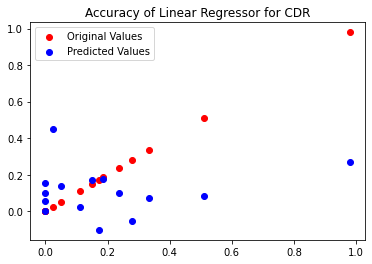

Linear Regression- R-Squared Value: -0.17296753046920732
Linear Regression- Root Mean Squared Error: 0.2650640776760429


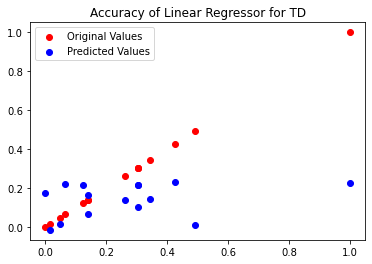

In [42]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
model1="Accuracy of Linear Regressor for CDR"
model2="Accuracy of Linear Regressor for TD"
linearRegression(X1_train,Y1_train,X1_test,Y1_test,model1)
linearRegression(X2_train,Y2_train,X2_test,Y2_test,model2)

rbf kernel- R-Squared Value: -0.16455641994479597
rbf kernel- Root Mean Squared Error: 0.2720786834980814


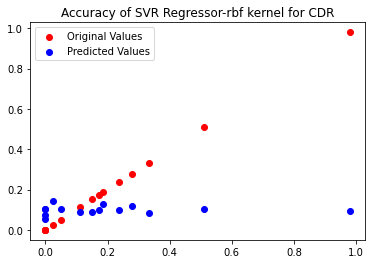

rbf kernel- R-Squared Value: -0.07658669531666251
rbf kernel- Root Mean Squared Error: 0.25394074173641473


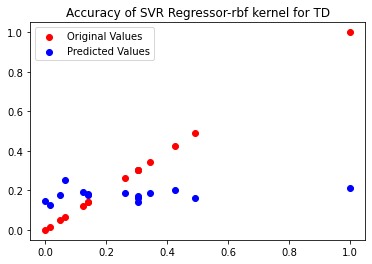

linear kernel- R-Squared Value: -0.12212300389682662
linear kernel- Root Mean Squared Error: 0.2670757664434763


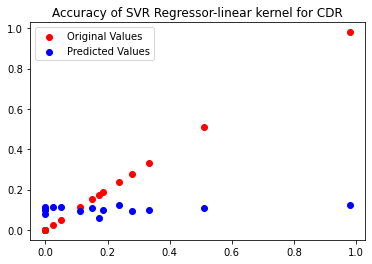

linear kernel- R-Squared Value: -0.3526354995047598
linear kernel- Root Mean Squared Error: 0.2846415332813681


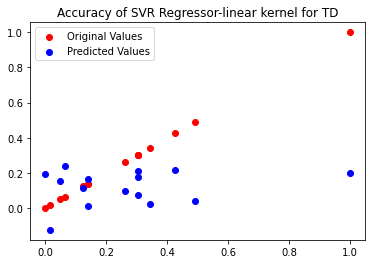

In [43]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
model1="Accuracy of SVR Regressor-rbf kernel for CDR"
model2="Accuracy of SVR Regressor-rbf kernel for TD"
svrRegression(X1_train,Y1_train,X1_test,Y1_test,model1)
svrRegression(X2_train,Y2_train,X2_test,Y2_test,model2)
model1="Accuracy of SVR Regressor-linear kernel for CDR"
model2="Accuracy of SVR Regressor-linear kernel for TD"
svrRegression(X1_train,Y1_train,X1_test,Y1_test,model1)
svrRegression(X2_train,Y2_train,X2_test,Y2_test,model2)

Decision Tree Regression- R-Squared Value: -0.12150757783825572
Decision Tree Regression- Root Mean Squared Error: 0.26700251782083956


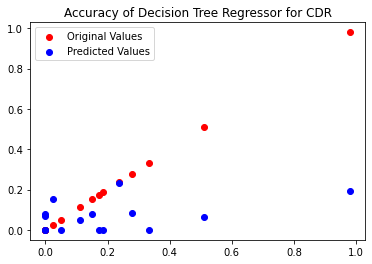

Decision Tree Regression- R-Squared Value: -0.5204592360688753
Decision Tree Regression- Root Mean Squared Error: 0.30178334647732696


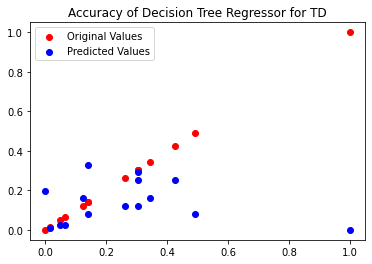

In [44]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
model1="Accuracy of Decision Tree Regressor for CDR"
model2="Accuracy of Decision Tree Regressor for TD"
decisionTreeRegression(X1_train,Y1_train,X1_test,Y1_test,model1)
decisionTreeRegression(X2_train,Y2_train,X2_test,Y2_test,model2)

Random Decision Tree Regression- R-Squared Value: -0.05101676969007363
Random Decision Tree Regression- Root Mean Squared Error: 0.25847531504491733


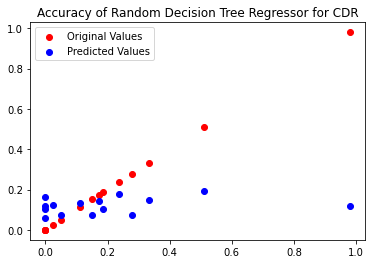

Random Decision Tree Regression- R-Squared Value: -0.16969786733401793
Random Decision Tree Regression- Root Mean Squared Error: 0.26469438498303655


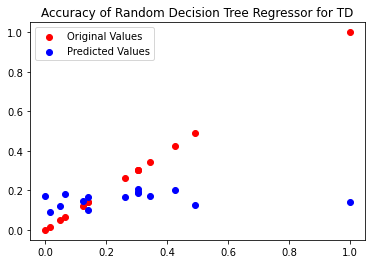

In [45]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
model1="Accuracy of Random Decision Tree Regressor for CDR"
model2="Accuracy of Random Decision Tree Regressor for TD"
randomDecTreeRegression(X1_train,Y1_train,X1_test,Y1_test,model1)
randomDecTreeRegression(X2_train,Y2_train,X2_test,Y2_test,model2)

Multi-layer Perceptron Regressor- R-Squared Value: -0.22435327148884165
Multi-layer Perceptron Regressor- Root Mean Squared Error: 0.27897650141415087


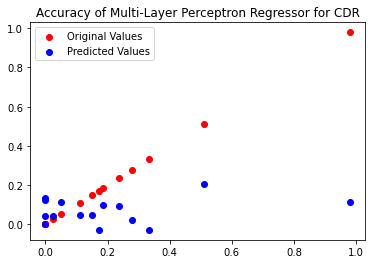

Multi-layer Perceptron Regressor- R-Squared Value: -0.4871772319255998
Multi-layer Perceptron Regressor- Root Mean Squared Error: 0.2984621365383263


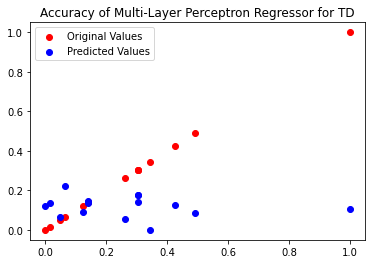

In [46]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
model1="Accuracy of Multi-Layer Perceptron Regressor for CDR"
model2="Accuracy of Multi-Layer Perceptron Regressor for TD"
mlpRegressor(X1_train,Y1_train,X1_test,Y1_test,model1)
mlpRegressor(X2_train,Y2_train,X2_test,Y2_test,model2)

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [47]:
#split data into train and test data
#for CDR
X1 = data.iloc[:,1:5].values
Y1 = data.iloc[:, 5].values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.30,random_state=random_state_fixed)
#for TD
X2 = data.iloc[:,1:5].values
Y2 = data.iloc[:, 6].values
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.30,random_state=random_state_fixed)

Linear Regression- R-Squared Value: -0.29877407933861844
Linear Regression- Root Mean Squared Error: 0.2873300555429503


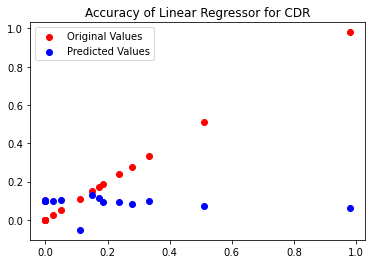

Linear Regression- R-Squared Value: -0.4331628534217624
Linear Regression- Root Mean Squared Error: 0.2929919249634493


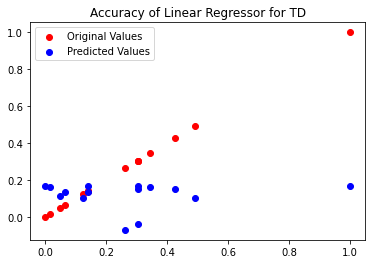

In [48]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
model1="Accuracy of Linear Regressor for CDR"
model2="Accuracy of Linear Regressor for TD"
linearRegression(X1_train,Y1_train,X1_test,Y1_test,model1)
linearRegression(X2_train,Y2_train,X2_test,Y2_test,model2)

rbf kernel- R-Squared Value: -0.05742000726843233
rbf kernel- Root Mean Squared Error: 0.2592614897703499


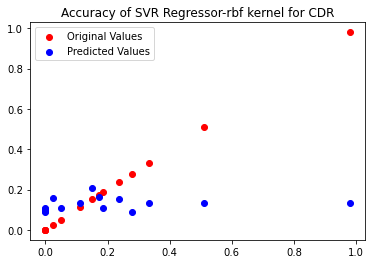

rbf kernel- R-Squared Value: -0.45281551449179935
rbf kernel- Root Mean Squared Error: 0.2949939533353097


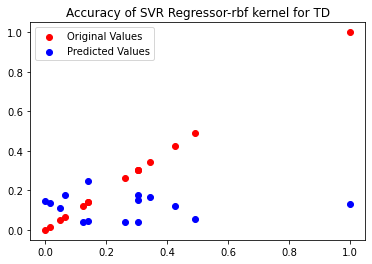

linear kernel- R-Squared Value: -0.10105796501066222
linear kernel- Root Mean Squared Error: 0.2645570517029422


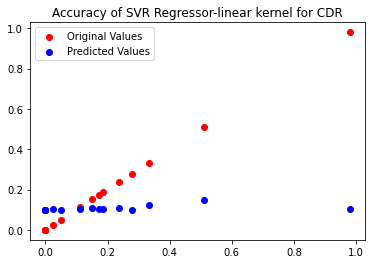

linear kernel- R-Squared Value: -0.3170558678590276
linear kernel- Root Mean Squared Error: 0.28087299055485854


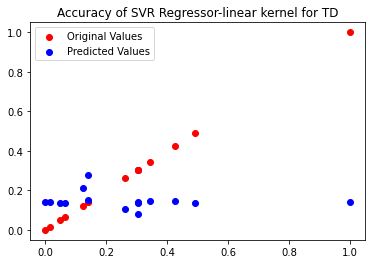

In [49]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
model1="Accuracy of SVR Regressor-rbf kernel for CDR"
model2="Accuracy of SVR Regressor-rbf kernel for TD"
svrRegression(X1_train,Y1_train,X1_test,Y1_test,model1)
svrRegression(X2_train,Y2_train,X2_test,Y2_test,model2)
model1="Accuracy of SVR Regressor-linear kernel for CDR"
model2="Accuracy of SVR Regressor-linear kernel for TD"
svrRegression(X1_train,Y1_train,X1_test,Y1_test,model1)
svrRegression(X2_train,Y2_train,X2_test,Y2_test,model2)

Decision Tree Regression- R-Squared Value: -0.49827719657436775
Decision Tree Regression- Root Mean Squared Error: 0.3086102422213462


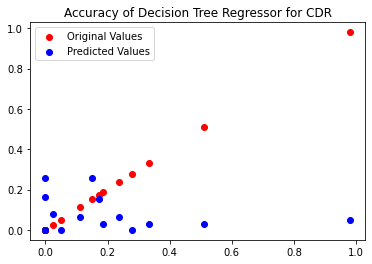

Decision Tree Regression- R-Squared Value: -0.7371656181142008
Decision Tree Regression- Root Mean Squared Error: 0.32257335573307827


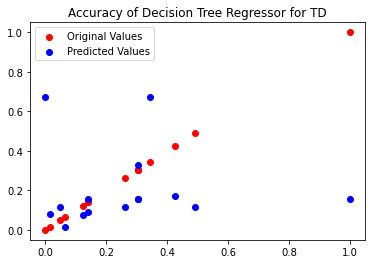

In [50]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
model1="Accuracy of Decision Tree Regressor for CDR"
model2="Accuracy of Decision Tree Regressor for TD"
decisionTreeRegression(X1_train,Y1_train,X1_test,Y1_test,model1)
decisionTreeRegression(X2_train,Y2_train,X2_test,Y2_test,model2)

Random Decision Tree Regression- R-Squared Value: -0.26333860652667807
Random Decision Tree Regression- Root Mean Squared Error: 0.28338322249338543


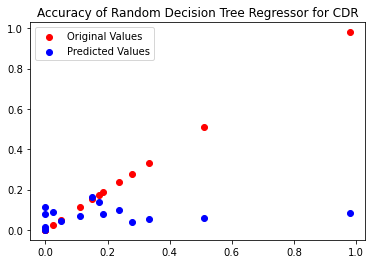

Random Decision Tree Regression- R-Squared Value: -0.11428872623308783
Random Decision Tree Regression- Root Mean Squared Error: 0.2583489780064541


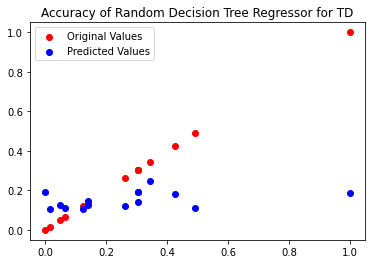

In [51]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
model1="Accuracy of Random Decision Tree Regressor for CDR"
model2="Accuracy of Random Decision Tree Regressor for TD"
randomDecTreeRegression(X1_train,Y1_train,X1_test,Y1_test,model1)
randomDecTreeRegression(X2_train,Y2_train,X2_test,Y2_test,model2)

Multi-layer Perceptron Regressor- R-Squared Value: -0.1733124776552255
Multi-layer Perceptron Regressor- Root Mean Squared Error: 0.2730996195799929


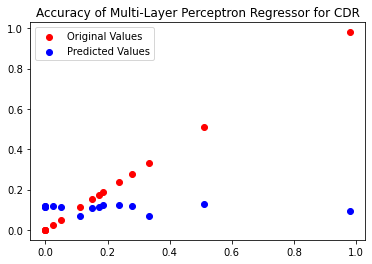

Multi-layer Perceptron Regressor- R-Squared Value: -0.1905169499496393
Multi-layer Perceptron Regressor- Root Mean Squared Error: 0.2670396014132049


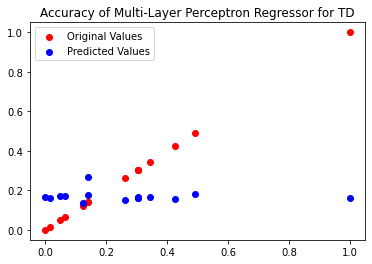

In [52]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
model1="Accuracy of Multi-Layer Perceptron Regressor for CDR"
model2="Accuracy of Multi-Layer Perceptron Regressor for TD"
mlpRegressor(X1_train,Y1_train,X1_test,Y1_test,model1)
mlpRegressor(X2_train,Y2_train,X2_test,Y2_test,model2)

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [53]:
#split data into train and test data
dropped = data.drop(columns=["Name","CDR","TD"])
#for CDR
X1 = dropped.values
Y1 = data.iloc[:, 5].values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.30,random_state=random_state_fixed)
#for TD
X2 = dropped.values
Y2 = data.iloc[:, 6].values
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.30,random_state=random_state_fixed)

Linear Regression- R-Squared Value: -2.009141591295796
Linear Regression- Root Mean Squared Error: 0.43735647669844613


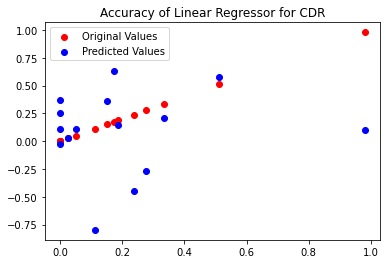

Linear Regression- R-Squared Value: -0.003633279100097697
Linear Regression- Root Mean Squared Error: 0.2451858519572479


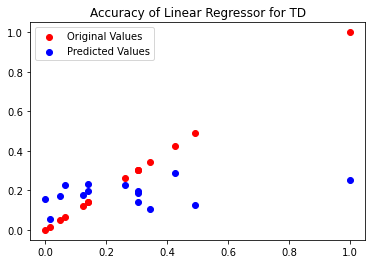

In [54]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
model1="Accuracy of Linear Regressor for CDR"
model2="Accuracy of Linear Regressor for TD"
linearRegression(X1_train,Y1_train,X1_test,Y1_test,model1)
linearRegression(X2_train,Y2_train,X2_test,Y2_test,model2)

rbf kernel- R-Squared Value: -0.23945919966775864
rbf kernel- Root Mean Squared Error: 0.2806922153718834


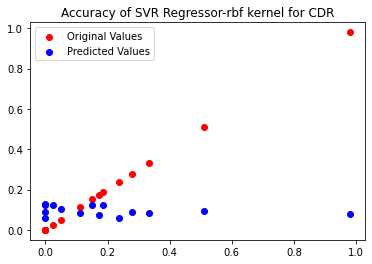

rbf kernel- R-Squared Value: -0.09720921648004222
rbf kernel- Root Mean Squared Error: 0.2563613813817413


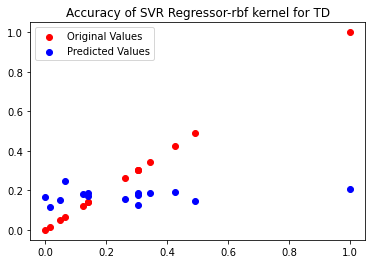

linear kernel- R-Squared Value: -0.1605709781449498
linear kernel- Root Mean Squared Error: 0.2716127193456499


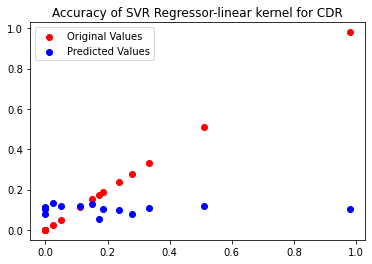

linear kernel- R-Squared Value: -0.36281172246930304
linear kernel- Root Mean Squared Error: 0.2857102425477753


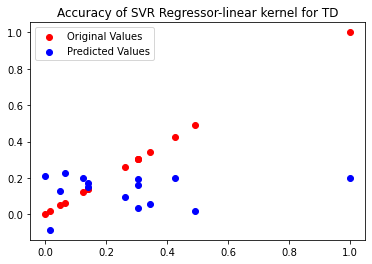

In [55]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
model1="Accuracy of SVR Regressor-rbf kernel for CDR"
model2="Accuracy of SVR Regressor-rbf kernel for TD"
svrRegression(X1_train,Y1_train,X1_test,Y1_test,model1)
svrRegression(X2_train,Y2_train,X2_test,Y2_test,model2)
model1="Accuracy of SVR Regressor-linear kernel for CDR"
model2="Accuracy of SVR Regressor-linear kernel for TD"
svrRegression(X1_train,Y1_train,X1_test,Y1_test,model1)
svrRegression(X2_train,Y2_train,X2_test,Y2_test,model2)

Decision Tree Regression- R-Squared Value: -0.05417378556625985
Decision Tree Regression- Root Mean Squared Error: 0.25886322456148736


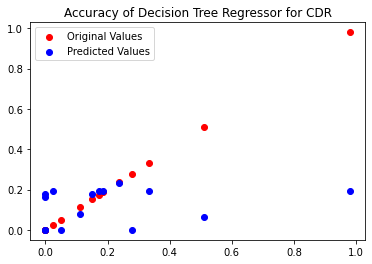

Decision Tree Regression- R-Squared Value: -0.2556706581453083
Decision Tree Regression- Root Mean Squared Error: 0.2742494419820825


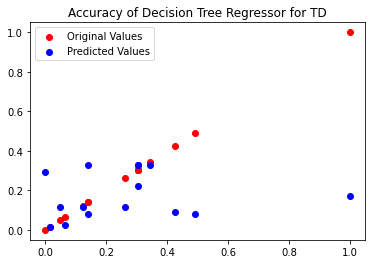

In [56]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
model1="Accuracy of Decision Tree Regressor for CDR"
model2="Accuracy of Decision Tree Regressor for TD"
decisionTreeRegression(X1_train,Y1_train,X1_test,Y1_test,model1)
decisionTreeRegression(X2_train,Y2_train,X2_test,Y2_test,model2)

Random Decision Tree Regression- R-Squared Value: 0.01479470371704672
Random Decision Tree Regression- Root Mean Squared Error: 0.2502520360002964


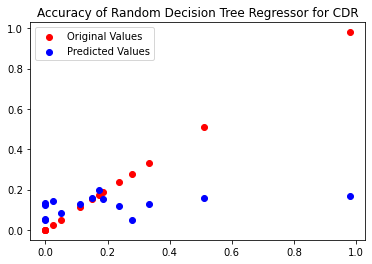

Random Decision Tree Regression- R-Squared Value: 0.07627455457291843
Random Decision Tree Regression- Root Mean Squared Error: 0.23522275547294955


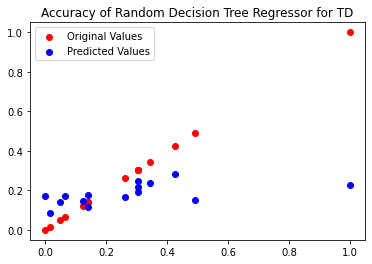

In [57]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
model1="Accuracy of Random Decision Tree Regressor for CDR"
model2="Accuracy of Random Decision Tree Regressor for TD"
randomDecTreeRegression(X1_train,Y1_train,X1_test,Y1_test,model1)
randomDecTreeRegression(X2_train,Y2_train,X2_test,Y2_test,model2)

Multi-layer Perceptron Regressor- R-Squared Value: -0.47729270505957055
Multi-layer Perceptron Regressor- Root Mean Squared Error: 0.30644146309720954


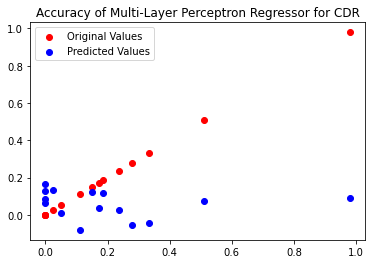

Multi-layer Perceptron Regressor- R-Squared Value: -0.09356621979107316
Multi-layer Perceptron Regressor- Root Mean Squared Error: 0.25593543701691623


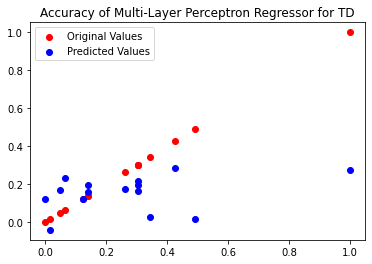

In [58]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
model1="Accuracy of Multi-Layer Perceptron Regressor for CDR"
model2="Accuracy of Multi-Layer Perceptron Regressor for TD"
mlpRegressor(X1_train,Y1_train,X1_test,Y1_test,model1)
mlpRegressor(X2_train,Y2_train,X2_test,Y2_test,model2)